In [1]:
# Importando librerias
import numpy as np
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
from util import plot_decision_regions

In [2]:
# Cargando datasets
ds = datasets.load_iris()
X, y = ds.data, ds.target
print(X[0:2], y[0:2])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]] [0 0]


In [3]:
# Aplicando un shuffle para desordenar el dataset
np.random.seed(0)
indexes = np.random.permutation(len(X))
print(indexes[0:2])

[114  62]


In [4]:
print(X[[114,62]], y[[114,62]])

[[ 5.8  2.8  5.1  2.4]
 [ 6.   2.2  4.   1. ]] [2 1]


In [5]:
X = X[indexes]
y = y[indexes]
print(X[0:2], y[0:2])

[[ 5.8  2.8  5.1  2.4]
 [ 6.   2.2  4.   1. ]] [2 1]


In [7]:
# Extrayendo un % para train y otro para test
train_percent = 0.8
train_limit = int(len(X) * train_percent)

X_train = X[0:train_limit]
X_test = X[train_limit:]
y_train = y[0:train_limit]
y_test = y[train_limit:]

In [8]:
# Entrenando el arbol de decision
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf = clf.fit(X_train, y_train)

In [10]:
# Haciendo pruebas
res = clf.predict(X_test)
print("Obtained")
print(res)
print("Expected")
print(y_test)
accuracy = clf.score(X_test, y_test)
print(accuracy)

Obtained
[0 2 0 0 2 0 2 1 1 1 2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]
Expected
[0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
0.933333333333


In [11]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

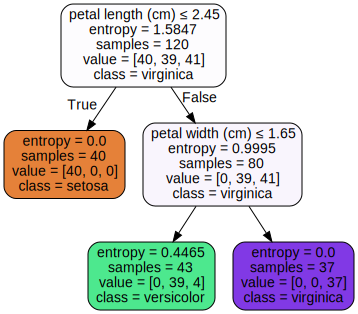

In [50]:
# Arbol más elaborado
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=ds.feature_names,  
                         class_names=ds.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Visualizando los datos

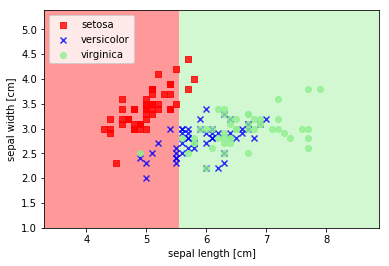

In [15]:
ds = datasets.load_iris()
X, y = ds.data[:,:2], ds.target

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf.fit(X, y)

plot_decision_regions(X, y, classifier=clf,ds=ds)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.show()

## Visualizando resultados por pares

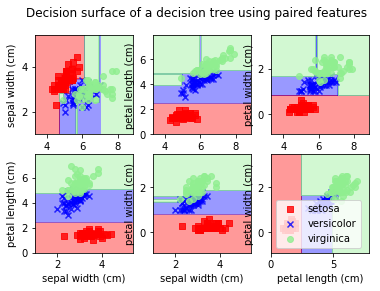

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # Seleccionando solo los pares de features correspondientes
    X = iris.data[:, pair]
    y = iris.target

    # Entrenamiento
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot
    plt.subplot(2, 3, pairidx + 1)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    plot_decision_regions(X, y, classifier=clf, ds=iris)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

## Visualizando diferentes clasificadores

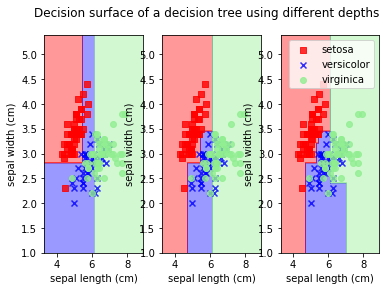

In [65]:
for pairidx, pair in enumerate([2, 3, 4]):
    # Seleccionando solo los pares de features correspondientes
    X = iris.data[:,0:2]
    y = iris.target

    # Entrenamiento
    clf = tree.DecisionTreeClassifier(max_depth=pair).fit(X, y)

    # Plot
    plt.subplot(1, 3, pairidx + 1)

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.axis("tight")
    plot_decision_regions(X, y, classifier=clf, ds=iris)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using different depths")
plt.legend()
plt.show()